In [2]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### TRAINING DATA:

In [3]:
X=pd.read_csv('train.csv')
X.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40


In [4]:
X.shape

(318438, 18)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
case_id                              318438 non-null int64
Hospital_code                        318438 non-null int64
Hospital_type_code                   318438 non-null object
City_Code_Hospital                   318438 non-null int64
Hospital_region_code                 318438 non-null object
Available Extra Rooms in Hospital    318438 non-null int64
Department                           318438 non-null object
Ward_Type                            318438 non-null object
Ward_Facility_Code                   318438 non-null object
Bed Grade                            318325 non-null float64
patientid                            318438 non-null int64
City_Code_Patient                    313906 non-null float64
Type of Admission                    318438 non-null object
Severity of Illness                  318438 non-null object
Visitors with Patient                318438 non-null

In [6]:
X.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

#### TESTING DATA:

In [7]:
X1=pd.read_csv('test.csv')
X1.tail(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0
137056,455495,6,a,6,X,3,gynecology,Q,F,4.0,126729,3.0,Trauma,Extreme,5,51-60,4702.0


In [8]:
X1.shape

(137057, 17)

In [9]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
case_id                              137057 non-null int64
Hospital_code                        137057 non-null int64
Hospital_type_code                   137057 non-null object
City_Code_Hospital                   137057 non-null int64
Hospital_region_code                 137057 non-null object
Available Extra Rooms in Hospital    137057 non-null int64
Department                           137057 non-null object
Ward_Type                            137057 non-null object
Ward_Facility_Code                   137057 non-null object
Bed Grade                            137022 non-null float64
patientid                            137057 non-null int64
City_Code_Patient                    134900 non-null float64
Type of Admission                    137057 non-null object
Severity of Illness                  137057 non-null object
Visitors with Patient                137057 non-null

In [10]:
X1.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

#### Data Given Info:

In [11]:
info=pd.read_csv('train_data_dict.csv')
info

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [12]:
X.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

### EDA : Univariant

In [30]:
def countc(col):
    plt.figure(figsize=(13,5))
    sns.countplot(X[col].dropna(),palette='Greens')
    plt.title('Count of'+col)
    plt.show()
    
    print('Value Distribution of',col)
    print(X[col].value_counts())
    print('')
    print('1. From the above info. we can observe that',col,X[col].value_counts().index[0],'has the highest count')
    print('2. While',col,X[col].value_counts().sort_values(ascending=True).index[0],'has the lowest count')
    print('---------------------------------------------------------------------------------------------------')
     

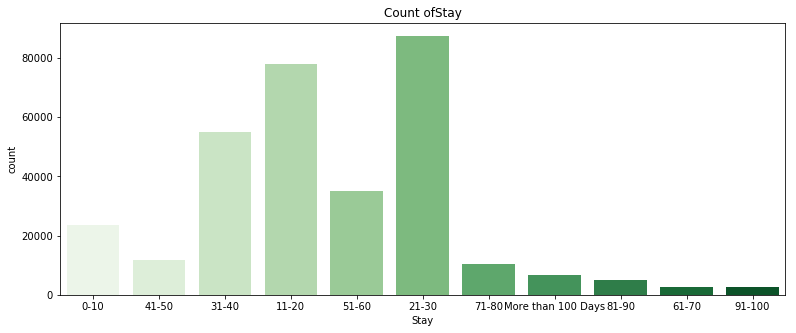

Value Distribution of Stay
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

1. From the above info. we can observe that Stay 21-30 has the highest count
2. While Stay 61-70 has the lowest count
---------------------------------------------------------------------------------------------------


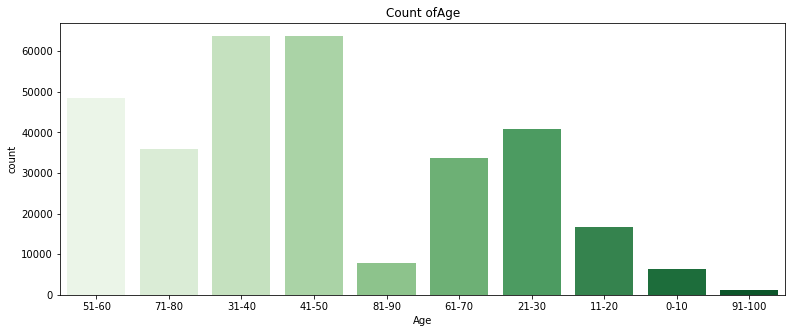

Value Distribution of Age
41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

1. From the above info. we can observe that Age 41-50 has the highest count
2. While Age 91-100 has the lowest count
---------------------------------------------------------------------------------------------------


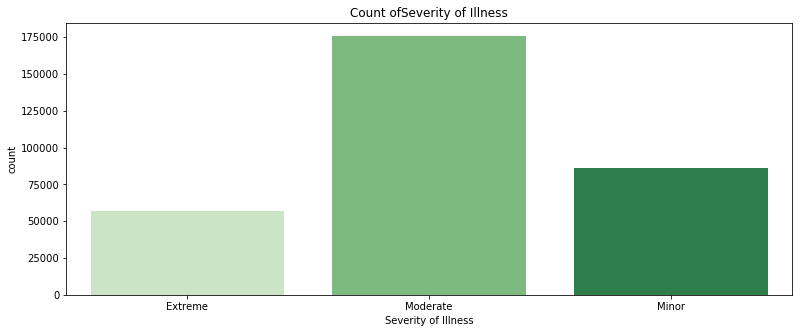

Value Distribution of Severity of Illness
Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

1. From the above info. we can observe that Severity of Illness Moderate has the highest count
2. While Severity of Illness Extreme has the lowest count
---------------------------------------------------------------------------------------------------


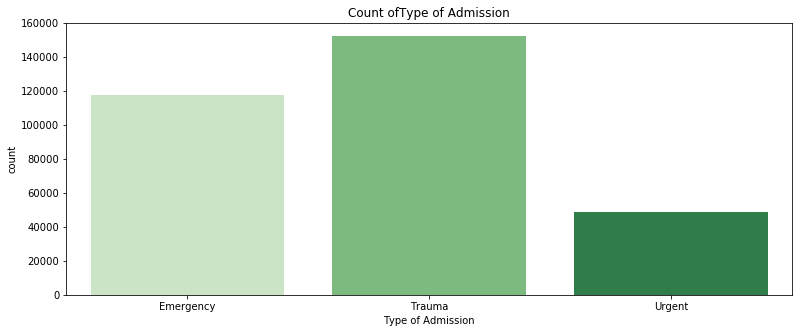

Value Distribution of Type of Admission
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

1. From the above info. we can observe that Type of Admission Trauma has the highest count
2. While Type of Admission Urgent has the lowest count
---------------------------------------------------------------------------------------------------


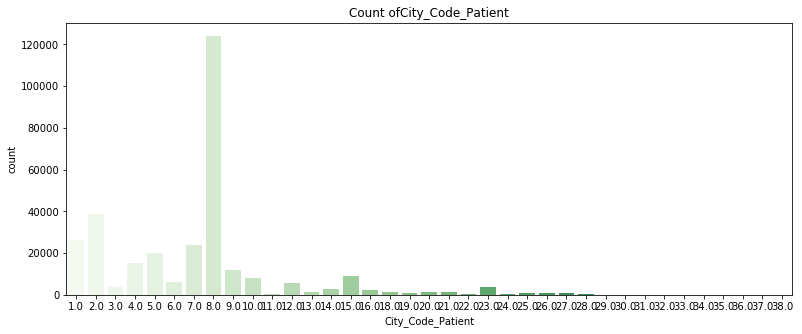

Value Distribution of City_Code_Patient
8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

1. From the above info. we can observe that City_Code_Patient 8.0 has the highest count
2. While City_Code_Patient 38.0 has the lowest count
---------------------------------------------------------------------------------------------------


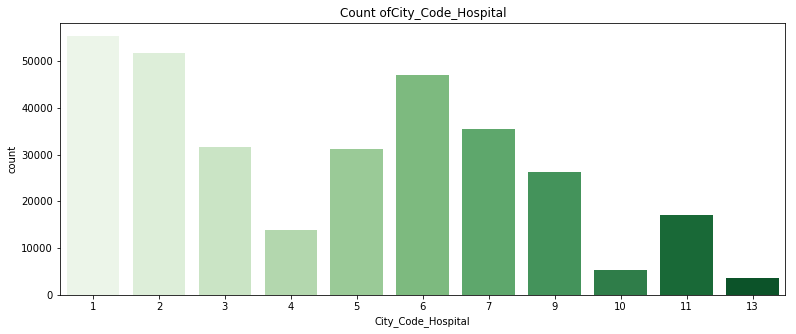

Value Distribution of City_Code_Hospital
1     55351
2     51809
6     46991
7     35463
3     31569
5     31105
9     26277
11    17137
4     13857
10     5249
13     3630
Name: City_Code_Hospital, dtype: int64

1. From the above info. we can observe that City_Code_Hospital 1 has the highest count
2. While City_Code_Hospital 13 has the lowest count
---------------------------------------------------------------------------------------------------


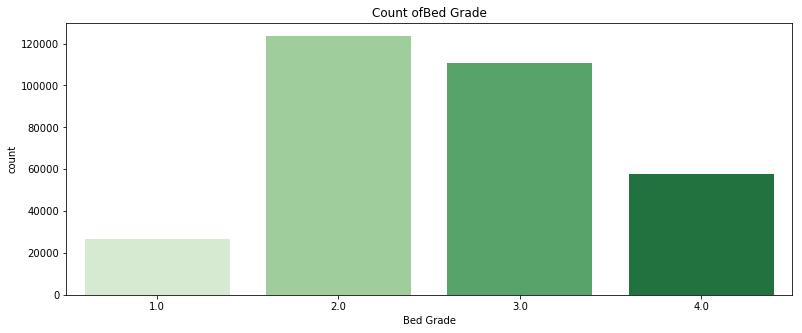

Value Distribution of Bed Grade
2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

1. From the above info. we can observe that Bed Grade 2.0 has the highest count
2. While Bed Grade 1.0 has the lowest count
---------------------------------------------------------------------------------------------------


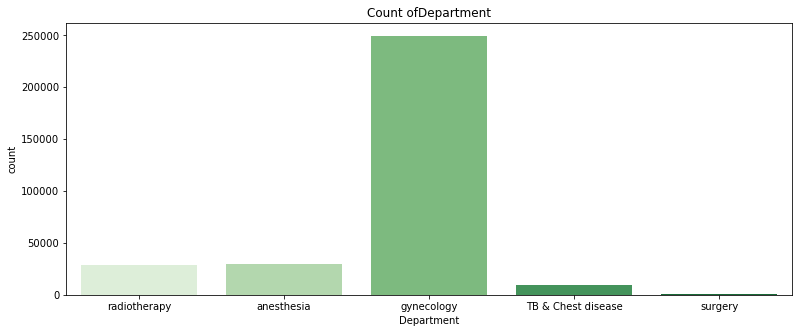

Value Distribution of Department
gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

1. From the above info. we can observe that Department gynecology has the highest count
2. While Department surgery has the lowest count
---------------------------------------------------------------------------------------------------


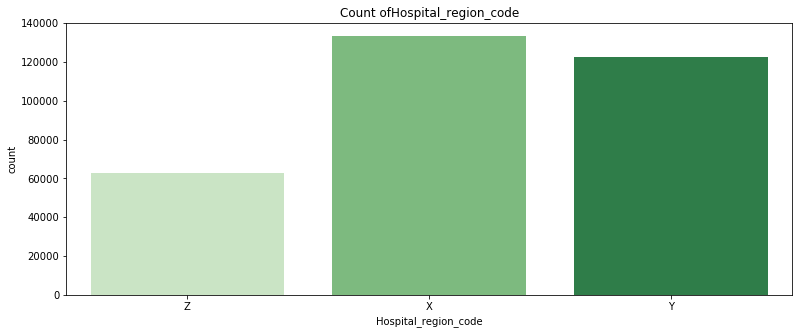

Value Distribution of Hospital_region_code
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

1. From the above info. we can observe that Hospital_region_code X has the highest count
2. While Hospital_region_code Z has the lowest count
---------------------------------------------------------------------------------------------------


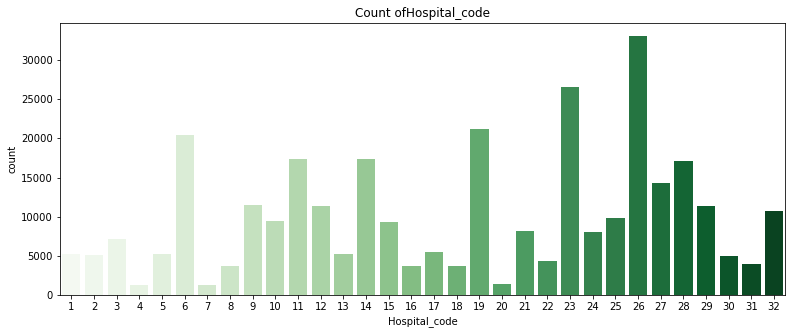

Value Distribution of Hospital_code
26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64

1. From the above info. we can observe that Hospital_code 26 has the highest count
2. While Hospital_code 4 has the lowest count
---------------------------------------------------------------------------------------------------


In [31]:
cols=['Stay','Age','Severity of Illness','Type of Admission','City_Code_Patient','City_Code_Hospital',
      'Bed Grade','Department','Hospital_region_code','Hospital_code']
for i in cols:
    countc(i)    

#### Bivariant wrt Target:

* Hypothesis:
* Higher severity of illness should increase the length of stay
* Type of Addmission should affect the length of stay
* ward type should affect the length of stay
* ward facility should affect the length of stay
* hospital type code should affect the length.

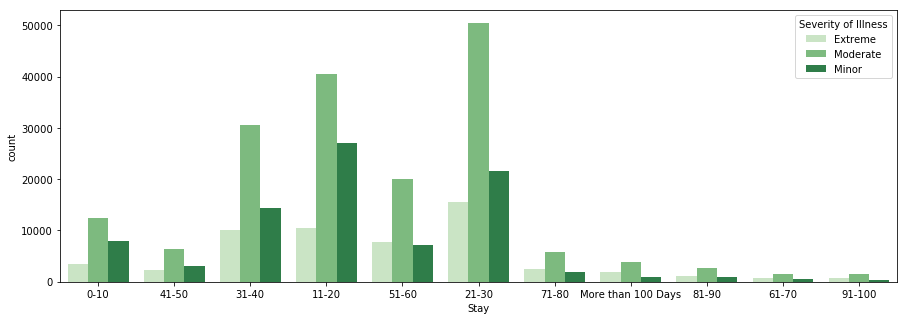

In [75]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stay',hue='Severity of Illness',data=X,palette='Greens')
plt.show()

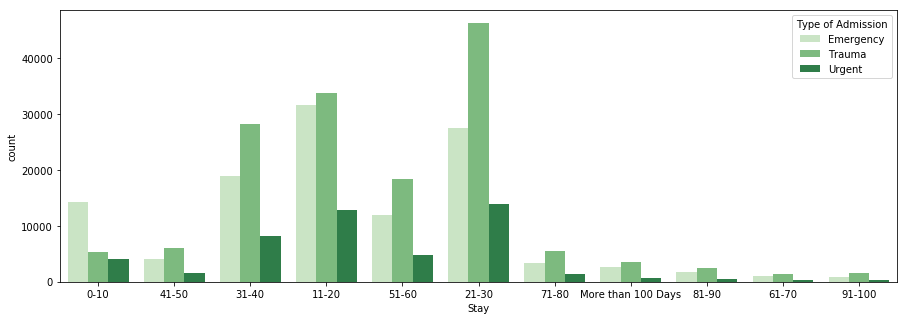

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stay',hue='Type of Admission',data=X,palette='Greens')
plt.show()

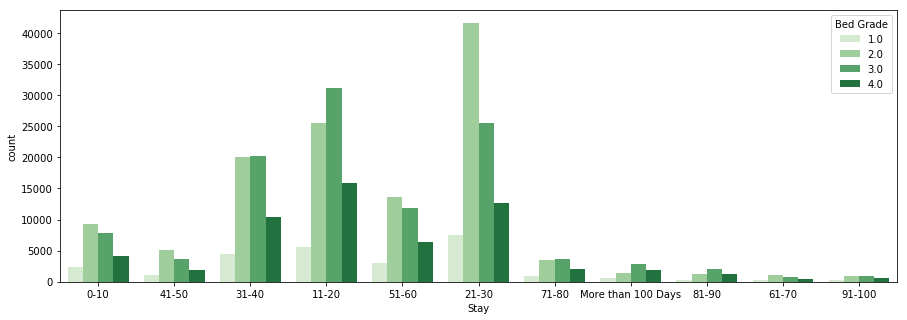

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stay',hue='Bed Grade',data=X,palette='Greens')
plt.show()

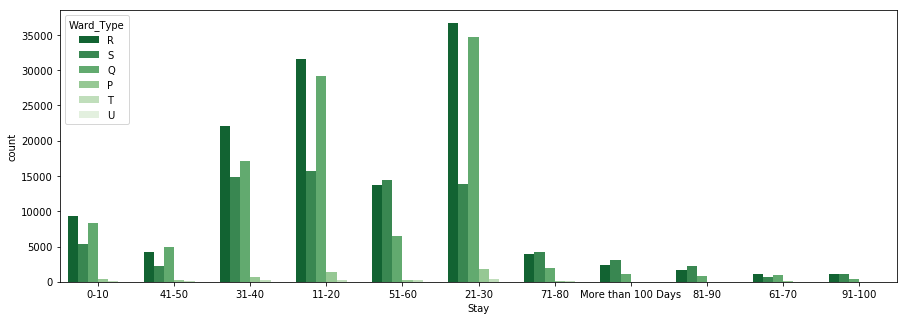

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stay',hue='Ward_Type',data=X,palette='Greens_r')
plt.show()

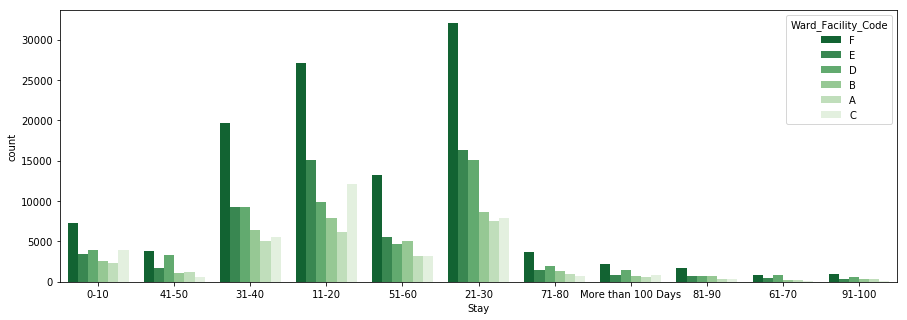

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stay',hue='Ward_Facility_Code',data=X,palette='Greens_r')
plt.show()

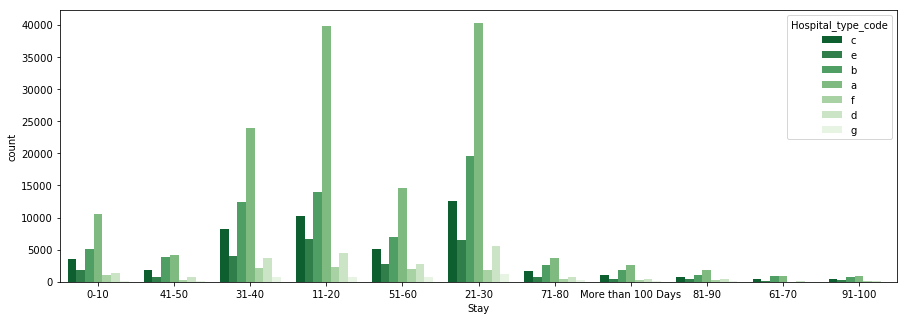

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stay',hue='Hospital_type_code',data=X,palette='Greens_r')
plt.show()

In [120]:
X['Admission_Deposit'].groupby(X['Stay']).mean()

Stay
0-10                  0.824860
11-20                 0.995457
21-30                 1.038118
31-40                 0.958266
41-50                 0.960232
51-60                 0.895682
61-70                 0.934402
71-80                 0.877121
81-90                 0.782555
91-100                0.878119
More than 100 Days    0.816699
Name: Admission_Deposit, dtype: float64

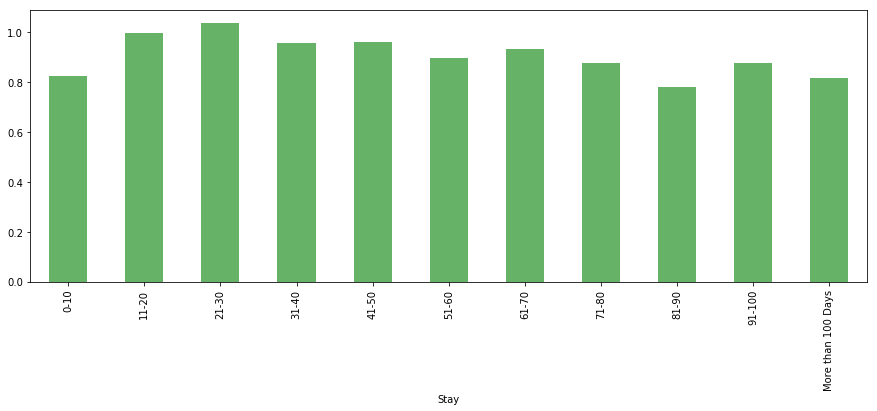

In [121]:
plt.figure(figsize=(15,5))
X['Admission_Deposit'].groupby(X['Stay']).mean().plot(kind='bar',color='g',alpha=0.6)
plt.show()

### Filling Null Values:

* Filling the null values with diffrent Bed Grade modes adjecent to the category of severity of illlness.
* This treats null values pricisely & part by part, present with in the bed grades. 

In [81]:
X['Severity of Illness'].unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [82]:
#filling null values for Traning Data:
col=['Extreme', 'Moderate', 'Minor']
for i in col:
    X.loc[X['Severity of Illness']==i,'Bed Grade']=X[X['Severity of Illness']==i]['Bed Grade'].fillna(X[X['Severity of Illness']==i]['Bed Grade'].dropna().mode()[0])

In [83]:
#filling null values for Test Data:
col=['Extreme', 'Moderate', 'Minor']
for i in col:
    X1.loc[X1['Severity of Illness']==i,'Bed Grade']=X1[X1['Severity of Illness']==i]['Bed Grade'].fillna(X1[X1['Severity of Illness']==i]['Bed Grade'].dropna().mode()[0])

In [84]:
X['City_Code_Patient'].fillna(X['City_Code_Patient'].mode()[0],inplace=True)

In [85]:
X1['City_Code_Patient'].fillna(X1['City_Code_Patient'].mode()[0],inplace=True)

In [86]:
X.shape

(318438, 18)

In [87]:
X1.shape

(137057, 17)

### Feature Engineering:

#### 1) Zone parameter labeling most amount of city patient codes with high,mid,low 

* For traning Data:

In [12]:
X['City_Code_Patient'].value_counts()

8.0     124011
2.0      38869
1.0      26377
7.0      23807
5.0      20079
4.0      15380
9.0      11795
15.0      8950
10.0      8174
6.0       6005
12.0      5647
3.0       3772
23.0      3698
14.0      2927
16.0      2254
13.0      1625
21.0      1602
20.0      1409
18.0      1404
19.0      1028
26.0      1023
25.0       798
27.0       771
11.0       658
28.0       521
22.0       405
24.0       360
30.0       133
29.0        98
33.0        78
31.0        59
37.0        57
32.0        52
34.0        46
35.0        16
36.0        12
38.0         6
Name: City_Code_Patient, dtype: int64

In [90]:
# Sorted out the Region pin codes from above with higher count.
L1=[ 8.0,  2.0,  1.0,  7.0,  5.0,  4.0,  9.0] 

#Sorted out the Region pin codes with mid count remainig are lower count pins.
L2=[ 15.0, 10.0,  6.0, 12.0,3.0, 23.0, 14.0, 16.0, 13.0, 21.0, 20.0, 18.0, 19.0, 26.0] 

In [91]:
#Flagged them accordingly to create new feature. 
def fn(x):
    if x in L1:
        return('High_Zone')
    elif x in L2:
        return('mid_Zone')
    else:
        return('Low_zone')

In [92]:
#Zone is now new feature which has flagged regions with higher and lower rate of covid crowd.
X['Zone']=X['City_Code_Patient'].apply(fn) 

In [93]:
X['Zone'].head()

0    High_Zone
1    High_Zone
2    High_Zone
3    High_Zone
4    High_Zone
Name: Zone, dtype: object

* For testing Data:

In [94]:
L3=[8.0,  2.0,  1.0,  7.0]
L4=[ 5.0,  4.0,  9.0, 15.0, 10.0,  6.0, 12.0,3.0, 23.0, 14.0]

In [95]:
def fn1(x):
    if x in L3:
        return('High_Zone')
    elif x in L4:
        return('mid_Zone')
    else:
        return('Low_zone')

In [96]:
X1['Zone']=X1['City_Code_Patient'].apply(fn1)

In [97]:
X1['Zone'].head()

0    High_Zone
1    High_Zone
2    High_Zone
3    High_Zone
4    High_Zone
Name: Zone, dtype: object

#### 2) Creating Bins For Admission Deposit:

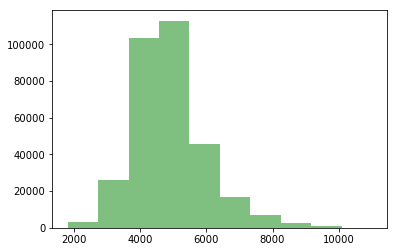

In [14]:
plt.hist(X['Admission_Deposit'],color='g',alpha=0.50)
plt.show()

#### For Traning data:

In [99]:
X.loc[X['Admission_Deposit']<=4000, 'Admission_Deposit']=0

X.loc[(X['Admission_Deposit']>4000) & (X['Admission_Deposit']<=6000), 'Admission_Deposit']=1

X.loc[(X['Admission_Deposit']>6000) & (X['Admission_Deposit']<=8000), 'Admission_Deposit']=2

X.loc[(X['Admission_Deposit']>8000) & (X['Admission_Deposit']<=11008), 'Admission_Deposit']=3

In [100]:
X['Admission_Deposit'].value_counts() #Train

1.0    218104
0.0     58458
2.0     36924
3.0      4952
Name: Admission_Deposit, dtype: int64

#### For Testing Data:

In [101]:
X1.loc[X1['Admission_Deposit']<=4000, 'Admission_Deposit']=0

X1.loc[(X1['Admission_Deposit']>4000) & (X1['Admission_Deposit']<=6000), 'Admission_Deposit']=1

X1.loc[(X1['Admission_Deposit']>6000) & (X1['Admission_Deposit']<=8000), 'Admission_Deposit']=2

X1.loc[(X1['Admission_Deposit']>8000) & (X1['Admission_Deposit']<=11920), 'Admission_Deposit']=3

In [102]:
X1['Admission_Deposit'].max() #Test

3.0

### LabelEncoding:

In [103]:
from sklearn.preprocessing import LabelEncoder #Traning
col=['Hospital_region_code','Zone','Hospital_type_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age']
le=LabelEncoder()
for i in col:
    X[i]=le.fit_transform(X[i])

In [104]:
from sklearn.preprocessing import LabelEncoder #Testing
col=['Hospital_region_code','Zone','Hospital_type_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission','Severity of Illness','Age']
le=LabelEncoder()
for i in col:
    X1[i]=le.fit_transform(X1[i])

In [105]:
X.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Zone
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,1.0,0-10,0
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,1.0,41-50,0


In [106]:
X1.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Zone
0,318439,21,2,3,2,3,2,3,0,2.0,17006,2.0,0,2,2,7,0.0,0
1,318440,29,0,4,0,2,2,3,5,2.0,17006,2.0,1,2,4,7,1.0,0


### Assinging:

In [107]:
X_train=X.drop(columns=['patientid','case_id','Stay'],axis=1)
Y_train=X['Stay']
X_train.head(3)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Zone
0,8,2,3,2,3,3,2,5,2.0,7.0,0,0,2,5,1.0,0
1,2,2,5,2,2,3,3,5,2.0,7.0,1,0,2,5,1.0,0
2,10,4,1,0,2,1,3,4,2.0,7.0,1,0,2,5,1.0,0


In [108]:
df_test=X1.drop(columns=['patientid','case_id'],axis=1)
df_test.head(3)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Zone
0,21,2,3,2,3,2,3,0,2.0,2.0,0,2,2,7,0.0,0
1,29,0,4,0,2,2,3,5,2.0,2.0,1,2,4,7,1.0,0
2,26,1,2,1,3,2,1,3,4.0,2.0,0,2,3,7,1.0,0


In [109]:
df_test.shape

(137057, 16)

### Scaling: 

In [110]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_test=sc.fit_transform(df_test)

### Building the Model:

In [57]:
from xgboost import XGBClassifier

In [58]:
model=XGBClassifier()

In [484]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### Function for Creating Submission file:

In [112]:
Subb=pd.read_csv('sample_submission_lfbv3c3.csv')

In [622]:
def creat(c,v):
    Predictor=v.predict(df_test)
    X=pd.DataFrame(Predictor)
    Y=pd.concat([Subb['case_id'],X],axis=1)
    Y.columns=['case_id','Stay']
    Y.to_csv(c,index=False)    

In [488]:
creat('Subbb.csv',model)

### save the model as pickle file:
* We Dont need to train the whole model again over big data which counsumed a lot of time:

In [160]:
import pickle 
file='Xgb_withou_optimization.pkl'
pickle.dump(model,open(file,'wb')) ## Exporting the pickle for model in current location .

In [164]:
import pickle
model_pickel=pickle.load(open('Xgb_withou_optimization.pkl','rb')) ## importing the pickle from current working location.

### Random CV:

In [614]:
from sklearn.model_selection import RandomizedSearchCV

In [615]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [616]:
Classifier=XGBClassifier()

In [617]:
XGB_rcv=RandomizedSearchCV(Classifier,param_distributions=params,n_iter=4,cv=3)

In [618]:
XGB_rcv.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...s_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depre

* Best params:

In [619]:
XGB_rcv.best_params_

{'subsample': 1.0,
 'min_child_weight': 10,
 'max_depth': 5,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

* Score:

In [620]:
XGB_rcv.best_score_*100

41.52017033143029

* Estimators:

In [621]:
XGB_rcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

#### Recalling the function to create submission file:

In [623]:
creat('subbb.csv',XGB_rcv)